# Introducción a _ggplot-plotnine_

## 1. Representa con _ggplot_ o _plotnine_ los datos del cuarteto de ascombe

In [31]:
import pandas as pd
from plotnine import (
    ggplot,
    geom_point,
    aes,
)

df = pd.read_csv('../data/anscombe.csv').drop('Unnamed: 0', axis=1)

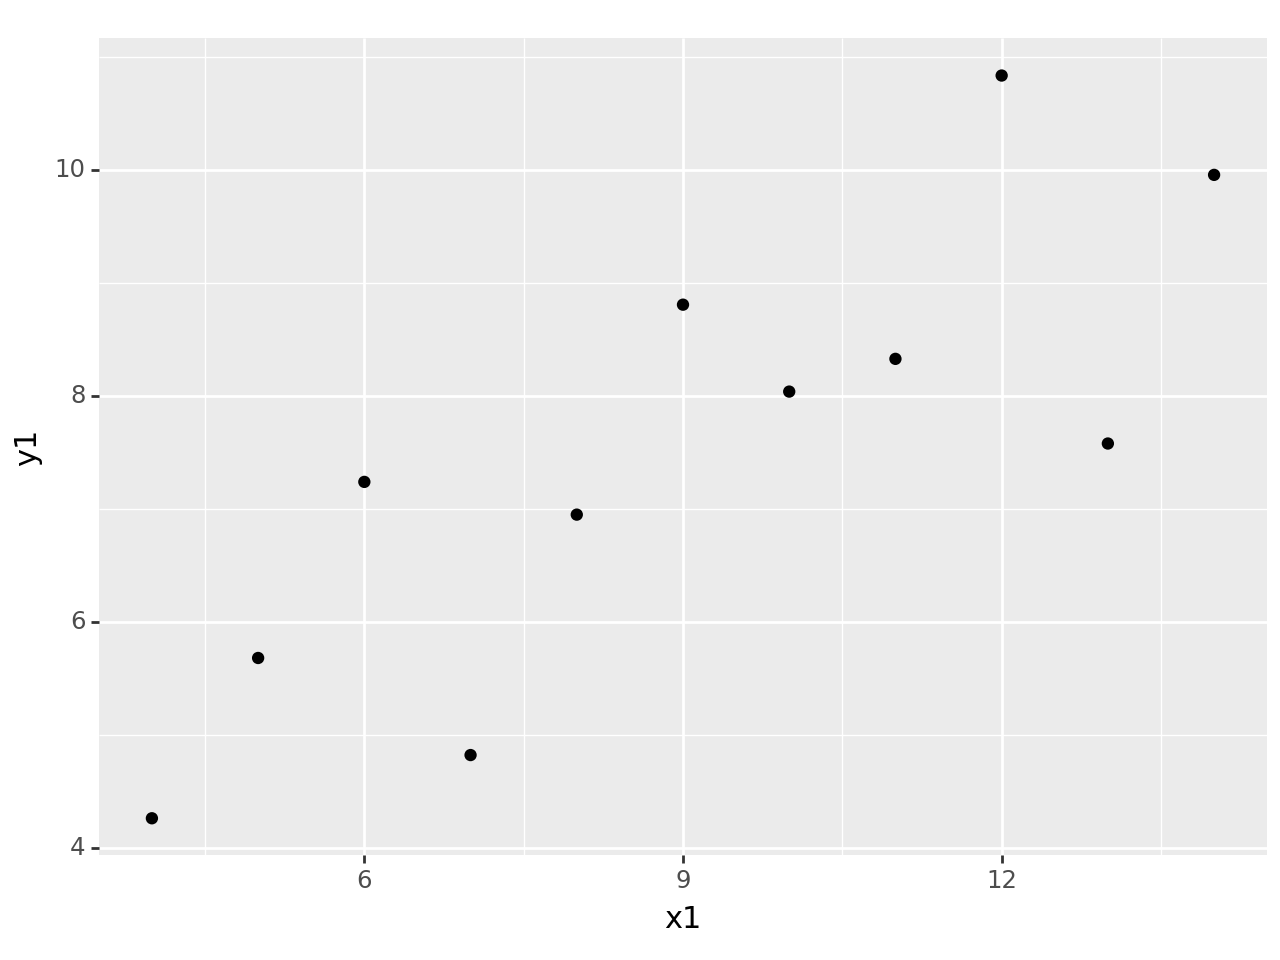

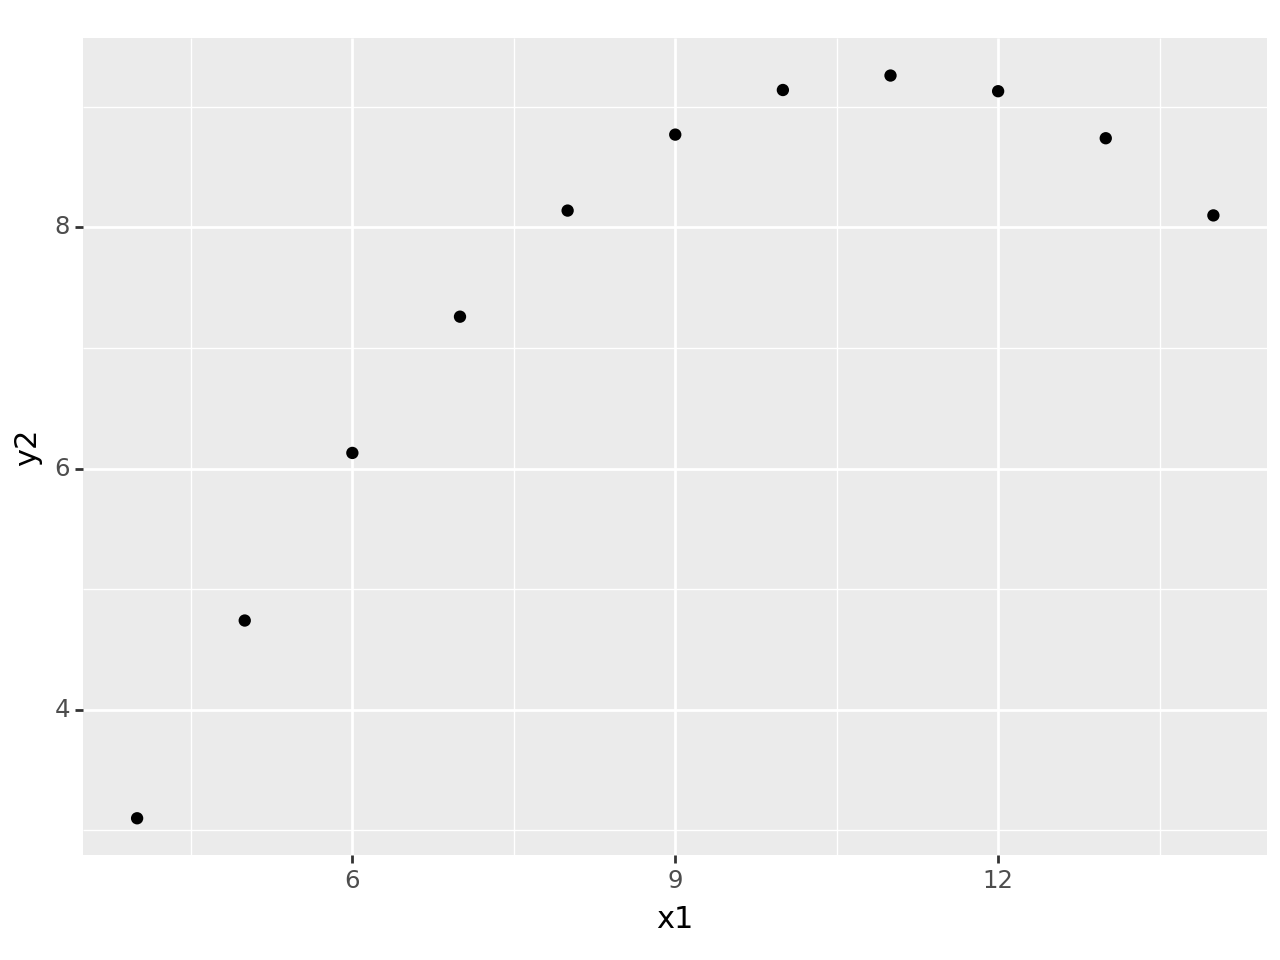

[<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>]

In [37]:
[
    ggplot(aes('x1', 'y1'), df) + geom_point(),
    ggplot(aes('x1', 'y2'), df) + geom_point()
]

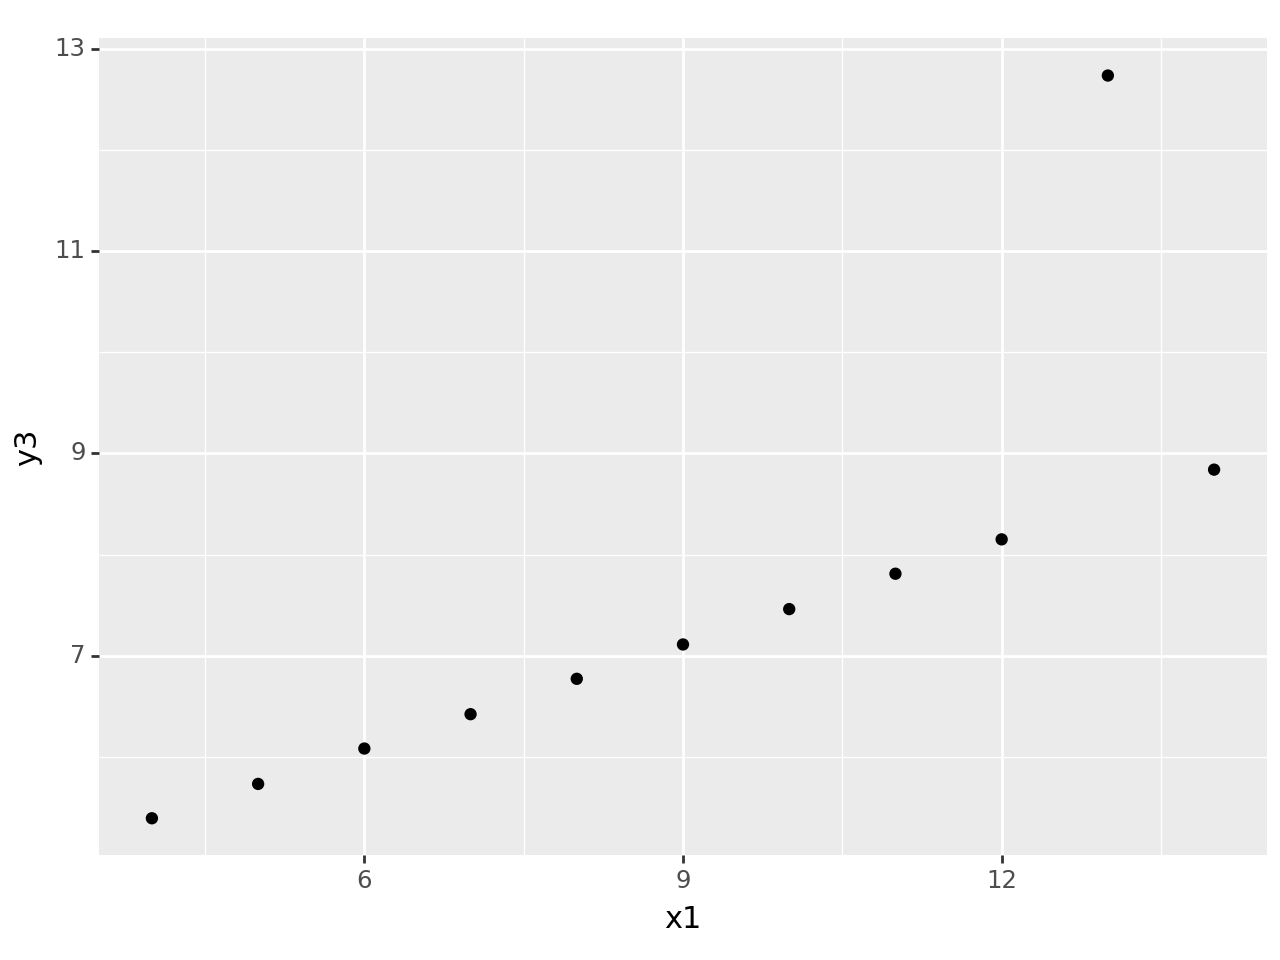

<Figure Size: (640 x 480)>

In [27]:
ggplot(aes(x = 'x1', y = 'y3'), df) + geom_point()

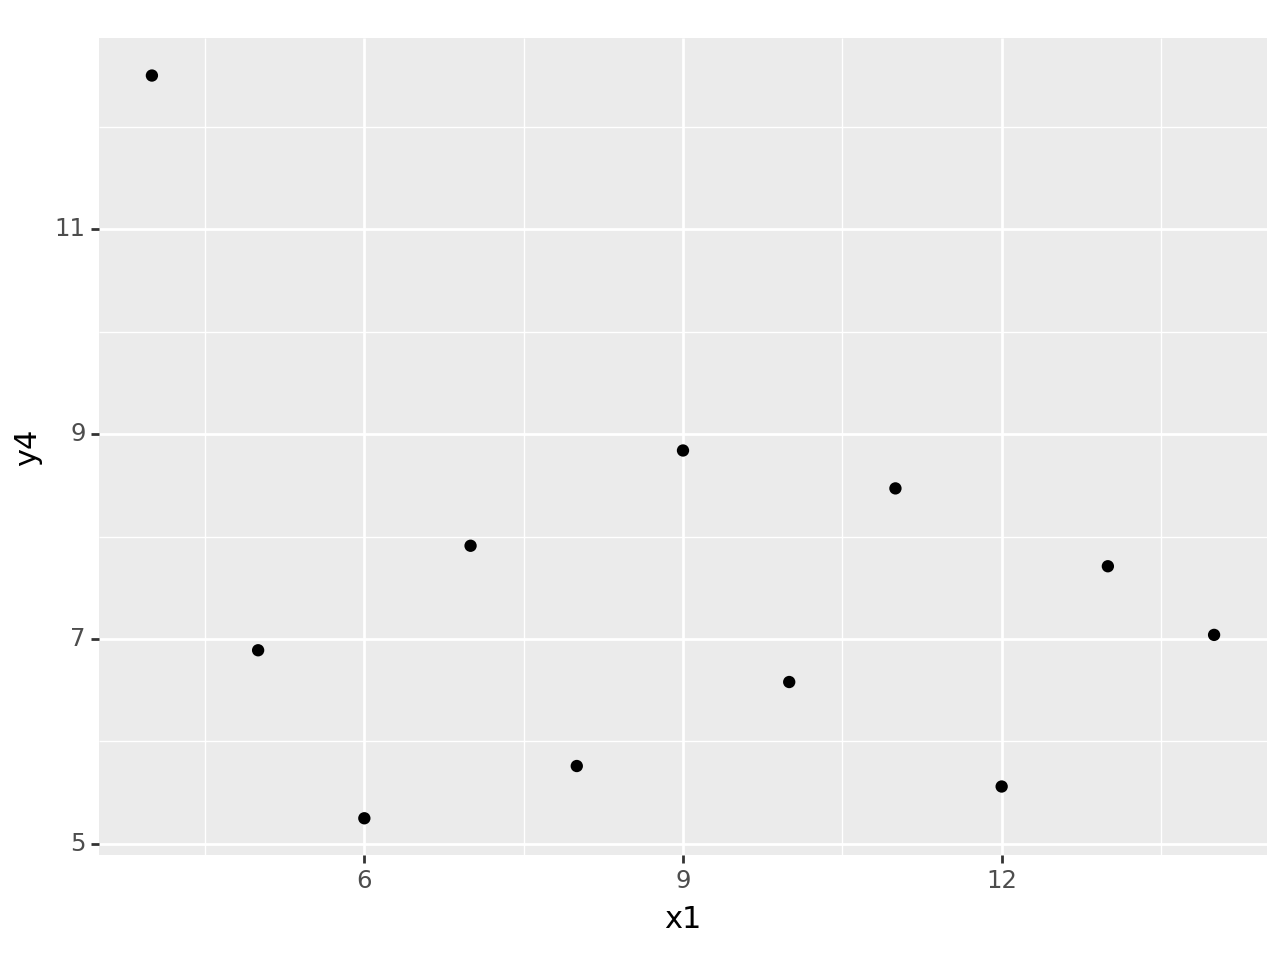

<Figure Size: (640 x 480)>

In [28]:
ggplot(aes(x = 'x1', y = 'y4'), df) + geom_point()

## 2. Prepara el fichero de causa de muerte para realizar gráficos utilizando el menor número posible de bucles

## 3. Utilizar la librería _ggplot_ o su equivalente _plotnine_ para realizar los siguientes gráficos sobre las causas de muerte en Canarias. Indica si encuentras alguna propuesta que no recomiendes utilizar, en cuyo caso presenta una alternativa más adecuada

### Gráfico de dispersión de defunciones cada año

### Gráfico de defunciones en el municipio de Arucas cada año 

### Gráfico de barras del total de defunciones cada año

### Gráfico de barras apiladas por cada causa de defunción al año

### Gráfico de burbujas en cada municipio por causa de defunción del año 2018 al 2021